# Generate input images

## Import libraries

In [10]:
import os
import cv2
import numpy as np
from PIL import Image
from pathlib import Path

## Detect a main folder that will has all images folders

In [ ]:
image_folder = Path('/Volumes/TOSHIBA/Github Repositories/transformers/Swin Transformer/images/input') # Input images 
print("Image folder:", image_folder.resolve())

Image folder: /Volumes/TOSHIBA/Github Repositories/transformers/Swin Transformer/images/input


## Create folders that have low quality image, noised and compressed image folders

In [18]:
def create_directories(image_folder):
    """Create necessary directories if they don't exist."""
    os.makedirs(os.path.join(image_folder, 'low_quality'), exist_ok=True)
    os.makedirs(os.path.join(image_folder, 'color_noise'), exist_ok=True)
    os.makedirs(os.path.join(image_folder, 'gray_noise'), exist_ok=True)
    os.makedirs(os.path.join(image_folder, 'color_jpeg'), exist_ok=True)
    os.makedirs(os.path.join(image_folder, 'gray_jpeg'), exist_ok=True)

## Create a function that is downsized images with scales which are 2,3,4 and 8 

In [20]:
def downsize_image(image, scale, name, image_folder):
    """Create downsized version of the image"""
    height, width = image.shape[:2]
    new_height = height // scale
    new_width = width // scale

    # Resize using INTER_AREA for downsizing (good quality)
    downsized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)


    # Save downsized image
    output_path = f'{image_folder}/low_quality/{name}_{scale}x.png'
    cv2.imwrite(output_path, downsized)
    print(f"Saved: {output_path}")

## Create a function that is noised images with noise level which are 15, 25 and 50

In [21]:

def add_gaussian_noise(image, noise_level):
    """Add Gaussian noise to image"""
    # Convert to float32 for noise addition
    image_float = image.astype(np.float32)

    # Generate Gaussian noise
    noise = np.random.normal(0, noise_level, image.shape).astype(np.float32)

    # Add noise and clip values to valid range
    noisy_image = np.clip(image_float + noise, 0, 255).astype(np.uint8)

    return noisy_image

In [22]:
def create_noisy_versions(image, name, image_folder):
    """Create noisy versions with different noise levels"""
    noise_levels = [15, 25, 50]

    # Convert BGR to RGB for processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    for noise_level in noise_levels:
        # Color noisy version
        color_noisy = add_gaussian_noise(image_rgb, noise_level)
        # Convert back to BGR for OpenCV saving
        color_noisy_bgr = cv2.cvtColor(color_noisy, cv2.COLOR_RGB2BGR)
        color_output_path = f'{image_folder}/color_noise/{name}_noise_{noise_level}.png'
        cv2.imwrite(color_output_path, color_noisy_bgr)
        print(f"Saved: {color_output_path}")

        # Grayscale noisy version
        gray_noisy = add_gaussian_noise(gray_image, noise_level)
        gray_output_path = f'{image_folder}/gray_noise/{name}_noise_{noise_level}.png'
        cv2.imwrite(gray_output_path, gray_noisy)
        print(f"Saved: {gray_output_path}")

## Create a function that is compressed images with compression levels which are 10, 20, 30 and 40

In [23]:
def create_jpeg_compressed_versions(image, name, image_folder):
    """Create JPEG compressed versions with different quality levels"""
    compression_levels = [10, 20, 30, 40]

    # Convert BGR to RGB for PIL processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)

    # Convert to grayscale PIL image
    gray_pil = pil_image.convert('L')

    for quality in compression_levels:
        # Color JPEG compressed version
        color_output_path = f'{image_folder}/color_jpeg/{name}_color_jpeg_{quality}.png'
        pil_image.save(color_output_path, 'JPEG', quality=quality)
        print(f"Saved: {color_output_path}")

        # Grayscale JPEG compressed version
        gray_output_path = f'{image_folder}/gray_jpeg/{name}_gray_jpeg_{quality}.png'
        gray_pil.save(gray_output_path, 'JPEG', quality=quality)
        print(f"Saved: {gray_output_path}")

## Process all functions

In [24]:
def process_image(image_path, image_folder):
  image = cv2.imread(image_path)
  if image is None:
    print(f"Error: Unable to read image from {image_path}")
    return

  name = os.path.splitext(os.path.basename(image_path))[0]
  print(f"Processing image: {name}")
  print(f"Original image size: {image.shape[1]}x{image.shape[0]}")

  create_directories(image_folder=image_folder)

  # 1. Create downsized versions (2x, 3x, 4x, 8x)
  print("\n=== Creating downsized versions ===")
  downsize_factors = [2, 3, 4, 8]
  for factor in downsize_factors:
      downsize_image(image, factor, name, image_folder)


  # 2. Create noisy versions (color and grayscale)
  print("\n=== Creating noisy versions ===")
  create_noisy_versions(image, name, image_folder)

  # 3. Create JPEG compressed versions
  print("\n=== Creating JPEG compressed versions ===")
  create_jpeg_compressed_versions(image, name, image_folder)

  print(f"\nProcessing complete! All versions saved for {name}")

## Generate all versions of image

In [25]:
image_original_dir = '/Volumes/TOSHIBA/Github Repositories/transformers/Swin Transformer/images/original'

for filename in os.listdir(image_original_dir):
    if filename.endswith('.jpeg'):
        img_path = os.path.join(image_original_dir, filename)
        try:
            #img = Image.open(img_path)
            print(f"Processing image: {filename}")
            process_image(img_path, image_folder)
        except Exception as e:
            print(f"Error processing image {filename}: {e}")


Processing image: audrey.jpeg
Processing image: audrey
Original image size: 417x600

=== Creating downsized versions ===
Saved: images/input/low_quality/audrey_2x.png
Saved: images/input/low_quality/audrey_3x.png
Saved: images/input/low_quality/audrey_4x.png
Saved: images/input/low_quality/audrey_8x.png

=== Creating noisy versions ===
Saved: images/input/color_noise/audrey_noise_15.png
Saved: images/input/gray_noise/audrey_noise_15.png
Saved: images/input/color_noise/audrey_noise_25.png
Saved: images/input/gray_noise/audrey_noise_25.png
Saved: images/input/color_noise/audrey_noise_50.png
Saved: images/input/gray_noise/audrey_noise_50.png

=== Creating JPEG compressed versions ===
Saved: images/input/color_jpeg/audrey_color_jpeg_10.png
Saved: images/input/gray_jpeg/audrey_gray_jpeg_10.png
Saved: images/input/color_jpeg/audrey_color_jpeg_20.png
Saved: images/input/gray_jpeg/audrey_gray_jpeg_20.png
Saved: images/input/color_jpeg/audrey_color_jpeg_30.png
Saved: images/input/gray_jpeg/audr

# Ploting all images

In [35]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 

In [36]:
image_folder = '/Volumes/TOSHIBA/Github Repositories/transformers/Swin Transformer/images/input'

In [37]:
def load_image_safe(path):
    """Safely load an image and handle errors"""
    try:
        if os.path.exists(path):
            # Try with OpenCV first
            img = cv2.imread(path)
            if img is not None:
                return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Fallback to PIL
            with Image.open(path) as pil_img:
                return np.array(pil_img)
        return None
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

In [38]:
def create_placeholder_image(text, size=(200, 200)):
    """Create a placeholder image with text when image is missing"""
    img = np.ones((*size, 3), dtype=np.uint8) * 128  # Gray background
    return img


In [39]:
def plot_downsized_versions(name, image_folder, fig_num=1):
    """Plot all downsized versions"""
    plt.figure(fig_num, figsize=(16, 4))
    plt.suptitle(f'Downsized Versions - {name}', fontsize=16, fontweight='bold')

    downsize_factors = [2, 3, 4, 8]

    for i, factor in enumerate(downsize_factors, 1):
        path = f'{image_folder}/low_quality/{name}_{factor}x.png'
        img = load_image_safe(path)

        plt.subplot(1, 4, i)
        if img is not None:
            plt.imshow(img)
            plt.title(f'{factor}x Downsize\nSize: {img.shape[1]}x{img.shape[0]}', fontsize=10)
        else:
            placeholder = create_placeholder_image(f'{factor}x\nMissing')
            plt.imshow(placeholder)
            plt.title(f'{factor}x Downsize\n(Missing)', fontsize=10, color='red')

        plt.axis('off')

    plt.tight_layout()

In [40]:
def plot_noisy_versions(name, image_folder, fig_num=2):
    """Plot all noisy versions (color and grayscale)"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Noisy Versions - {name}', fontsize=16, fontweight='bold')

    noise_levels = [15, 25, 50]

    # Color noisy versions (top row)
    for i, noise_level in enumerate(noise_levels):
        path = f'{image_folder}/color_noise/{name}_noise_{noise_level}.png'
        img = load_image_safe(path)

        ax = axes[0, i]
        if img is not None:
            ax.imshow(img)
            ax.set_title(f'Color Noise: σ={noise_level}\nSize: {img.shape[1]}x{img.shape[0]}', fontsize=10)
        else:
            placeholder = create_placeholder_image(f'Color\nNoise {noise_level}')
            ax.imshow(placeholder)
            ax.set_title(f'Color Noise: σ={noise_level}\n(Missing)', fontsize=10, color='red')

        ax.axis('off')

    # Grayscale noisy versions (bottom row)
    for i, noise_level in enumerate(noise_levels):
        path = f'{image_folder}/gray_noise/{name}_noise_{noise_level}.png'
        img = load_image_safe(path)

        ax = axes[1, i]
        if img is not None:
            if len(img.shape) == 2:  # Grayscale
                ax.imshow(img, cmap='gray')
            else:  # Color image displayed as grayscale
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
            ax.set_title(f'Gray Noise: σ={noise_level}\nSize: {img.shape[1]}x{img.shape[0]}', fontsize=10)
        else:
            placeholder = create_placeholder_image(f'Gray\nNoise {noise_level}')
            ax.imshow(placeholder, cmap='gray')
            ax.set_title(f'Gray Noise: σ={noise_level}\n(Missing)', fontsize=10, color='red')

        ax.axis('off')

    plt.tight_layout()

In [41]:
def plot_jpeg_versions(name, image_folder, fig_num=3):
    """Plot all JPEG compressed versions (color and grayscale)"""
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'JPEG Compressed Versions - {name}', fontsize=16, fontweight='bold')

    compression_levels = [10, 20, 30, 40]

    # Color JPEG versions (top row)
    for i, quality in enumerate(compression_levels):
        path = f'{image_folder}/color_jpeg/{name}_color_jpeg_{quality}.png'
        img = load_image_safe(path)

        ax = axes[0, i]
        if img is not None:
            ax.imshow(img)
            # Calculate file size if possible
            file_size = ""
            if os.path.exists(path):
                size_kb = os.path.getsize(path) / 1024
                file_size = f"\nSize: {size_kb:.1f}KB"
            ax.set_title(f'Color JPEG: Q={quality}{file_size}', fontsize=10)
        else:
            placeholder = create_placeholder_image(f'Color\nJPEG {quality}')
            ax.imshow(placeholder)
            ax.set_title(f'Color JPEG: Q={quality}\n(Missing)', fontsize=10, color='red')

        ax.axis('off')

    # Grayscale JPEG versions (bottom row)
    for i, quality in enumerate(compression_levels):
        path = f'{image_folder}/gray_jpeg/{name}_gray_jpeg_{quality}.png'
        img = load_image_safe(path)

        ax = axes[1, i]
        if img is not None:
            if len(img.shape) == 2:  # Grayscale
                ax.imshow(img, cmap='gray')
            else:  # Color image displayed as grayscale
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
            # Calculate file size if possible
            file_size = ""
            if os.path.exists(path):
                size_kb = os.path.getsize(path) / 1024
                file_size = f"\nSize: {size_kb:.1f}KB"
            ax.set_title(f'Gray JPEG: Q={quality}{file_size}', fontsize=10)
        else:
            placeholder = create_placeholder_image(f'Gray\nJPEG {quality}')
            ax.imshow(placeholder, cmap='gray')
            ax.set_title(f'Gray JPEG: Q={quality}\n(Missing)', fontsize=10, color='red')

        ax.axis('off')

    plt.tight_layout()

In [42]:
def plot_original_image(image_path, fig_num=4):
    """Plot the original image for reference"""
    plt.figure(fig_num, figsize=(8, 6))

    img = load_image_safe(image_path)
    if img is not None:
        plt.imshow(img)
        file_size_kb = os.path.getsize(image_path) / 1024 if os.path.exists(image_path) else 0
        plt.title(f'Original Image\nSize: {img.shape[1]}x{img.shape[0]}\nFile Size: {file_size_kb:.1f}KB',
                 fontsize=14, fontweight='bold')
    else:
        placeholder = create_placeholder_image('Original\nMissing', size=(400, 400))
        plt.imshow(placeholder)
        plt.title('Original Image (Missing)', fontsize=14, color='red')

    plt.axis('off')
    plt.tight_layout()

In [43]:
def create_summary_plot(name, image_folder, fig_num=5):
    """Create a summary plot with all versions in one view"""
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))
    fig.suptitle(f'Complete Summary - All Versions of {name}', fontsize=20, fontweight='bold')

    # Row 1: Downsized versions + original
    downsize_factors = [2, 3, 4, 8]
    for i, factor in enumerate(downsize_factors):
        path = f'{image_folder}/low_quality/{name}_{factor}x.png'
        img = load_image_safe(path)
        ax = axes[0, i]
        if img is not None:
            ax.imshow(img)
            ax.set_title(f'{factor}x Downsize', fontsize=10)
        else:
            ax.imshow(create_placeholder_image(f'{factor}x'))
            ax.set_title(f'{factor}x (Missing)', color='red', fontsize=10)
        ax.axis('off')

    # Original in last column of first row
    axes[0, 4].text(0.5, 0.5, 'ORIGINAL\nREFERENCE', ha='center', va='center',
                    fontsize=16, fontweight='bold', transform=axes[0, 4].transAxes)
    axes[0, 4].axis('off')

    # Row 2: Color noise versions
    noise_levels = [15, 25, 50]
    for i, noise_level in enumerate(noise_levels):
        path = f'{image_folder}/color_noise/{name}_noise_{noise_level}.png'
        img = load_image_safe(path)
        ax = axes[1, i]
        if img is not None:
            ax.imshow(img)
            ax.set_title(f'Color Noise σ={noise_level}', fontsize=10)
        else:
            ax.imshow(create_placeholder_image(f'C.Noise\n{noise_level}'))
            ax.set_title(f'Color Noise σ={noise_level}\n(Missing)', color='red', fontsize=8)
        ax.axis('off')

    # Row 3: Gray noise versions
    for i, noise_level in enumerate(noise_levels):
        path = f'{image_folder}/gray_noise/{name}_noise_{noise_level}.png'
        img = load_image_safe(path)
        ax = axes[2, i]
        if img is not None:
            if len(img.shape) == 2:
                ax.imshow(img, cmap='gray')
            else:
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
            ax.set_title(f'Gray Noise σ={noise_level}', fontsize=10)
        else:
            ax.imshow(create_placeholder_image(f'G.Noise\n{noise_level}'), cmap='gray')
            ax.set_title(f'Gray Noise σ={noise_level}\n(Missing)', color='red', fontsize=8)
        ax.axis('off')

    # Row 4: JPEG versions (color and gray mixed)
    compression_levels = [10, 20, 30, 40]
    for i, quality in enumerate(compression_levels):
        # Alternate between color and gray JPEG
        if i % 2 == 0:  # Even indices: color JPEG
            path = f'{image_folder}/color_jpeg/{name}_color_jpeg_{quality}.png'
            title_prefix = 'Color JPEG'
        else:  # Odd indices: gray JPEG
            path = f'{image_folder}/gray_jpeg/{name}_gray_jpeg_{quality}.png'
            title_prefix = 'Gray JPEG'

        img = load_image_safe(path)
        ax = axes[3, i]
        if img is not None:
            if 'gray' in title_prefix.lower() and len(img.shape) > 2:
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
            elif 'gray' in title_prefix.lower():
                ax.imshow(img, cmap='gray')
            else:
                ax.imshow(img)
            ax.set_title(f'{title_prefix} Q={quality}', fontsize=10)
        else:
            ax.imshow(create_placeholder_image(f'JPEG\n{quality}'))
            ax.set_title(f'{title_prefix} Q={quality}\n(Missing)', color='red', fontsize=8)
        ax.axis('off')

    # Remove unused subplots
    for i in range(3, 5):  # Remove last two positions in rows 2 and 3
        axes[1, i].remove()
        axes[2, i].remove()
    axes[3, 4].remove()  # Remove last position in row 4

    plt.tight_layout()

In [44]:
def plot_all_versions(image_path, image_folder):
    """Main function to plot all versions of an image"""
    # Get image name without extension
    name = os.path.splitext(os.path.basename(image_path))[0]

    print(f"Creating plots for: {name}")

    # Create all plots
    plot_original_image(image_path, fig_num=1)
    plot_downsized_versions(name, image_folder, fig_num=2)
    plot_noisy_versions(name, image_folder, fig_num=3)
    plot_jpeg_versions(name, image_folder, fig_num=4)
    create_summary_plot(name, image_folder, fig_num=5)

    # Show all plots
    plt.show()

In [45]:
import os 
image_path = '/Volumes/TOSHIBA/Github Repositories/transformers/Swin Transformer/images/original/audrey.jpeg'
name = os.path.basename(image_path).replace('.jpeg','')
print(f'Found processed image for: {name}')

Found processed image for: audrey


Creating plots for: audrey


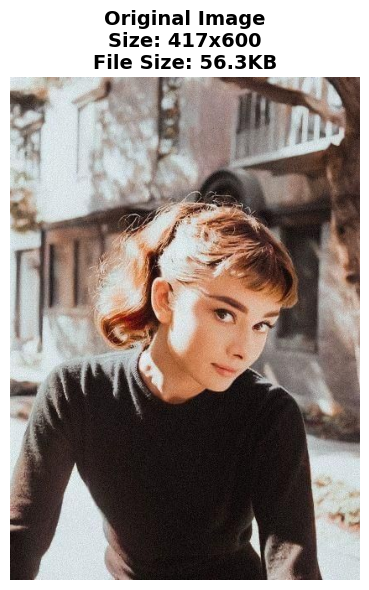

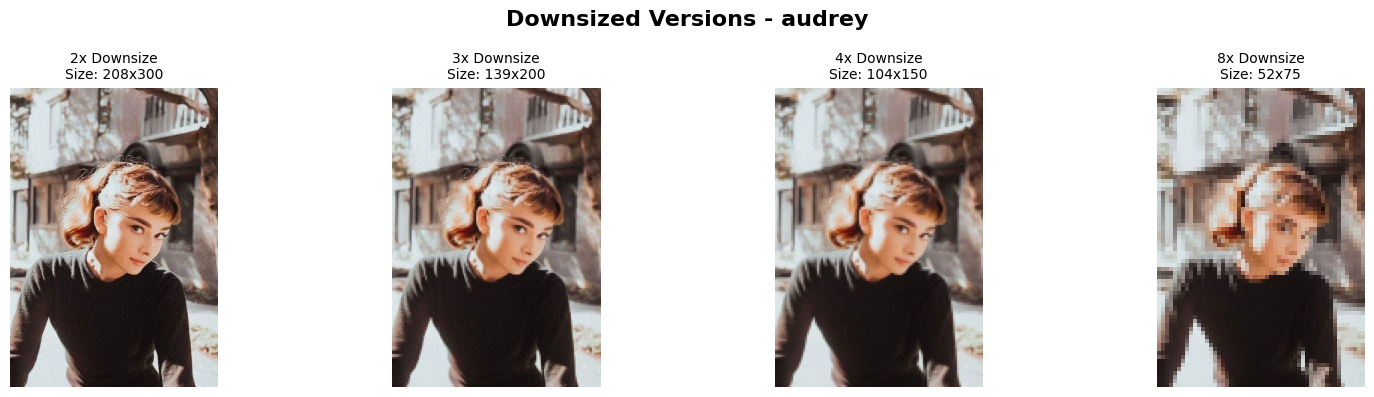

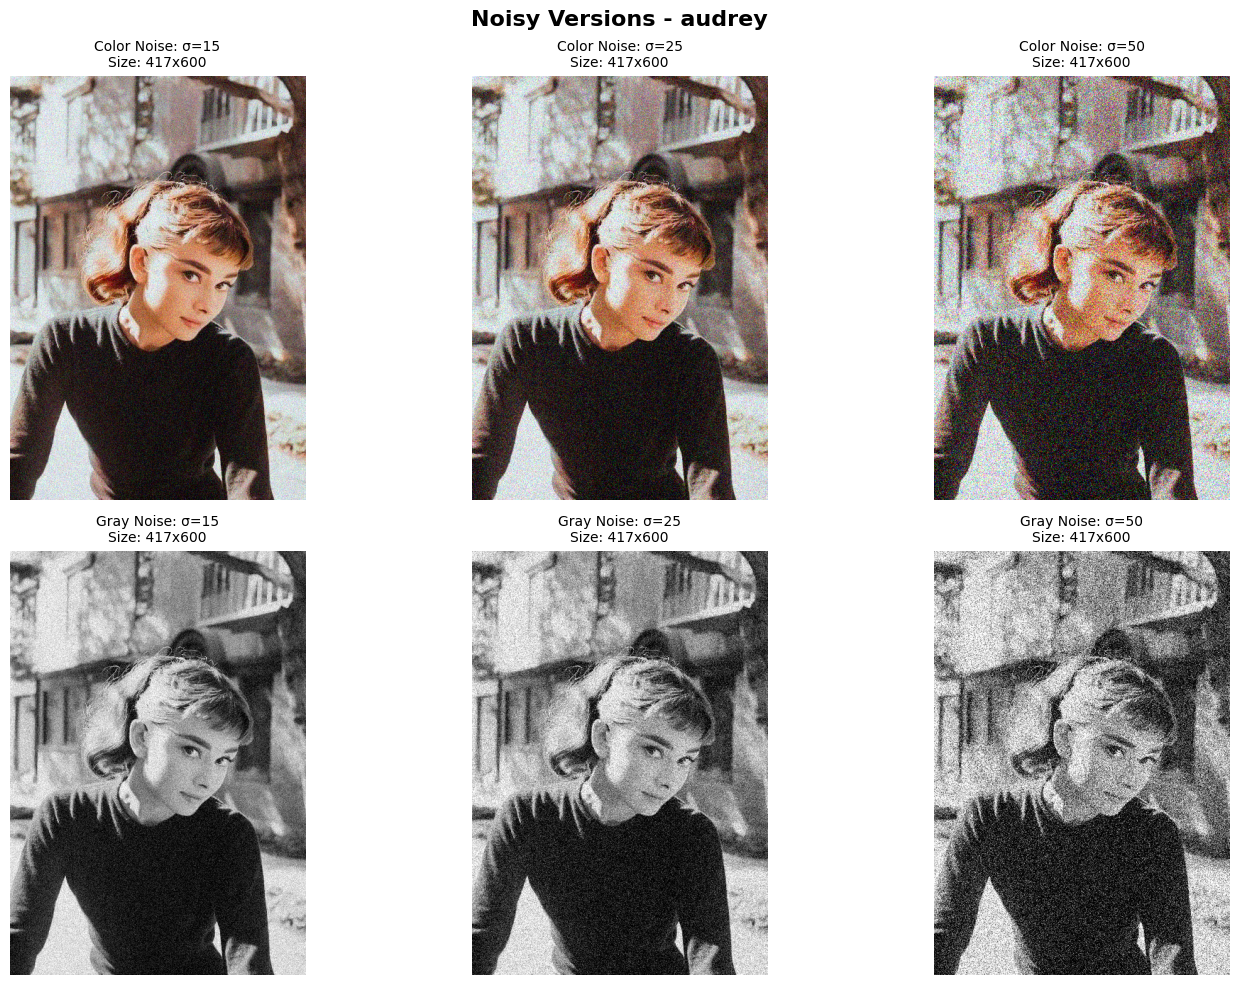

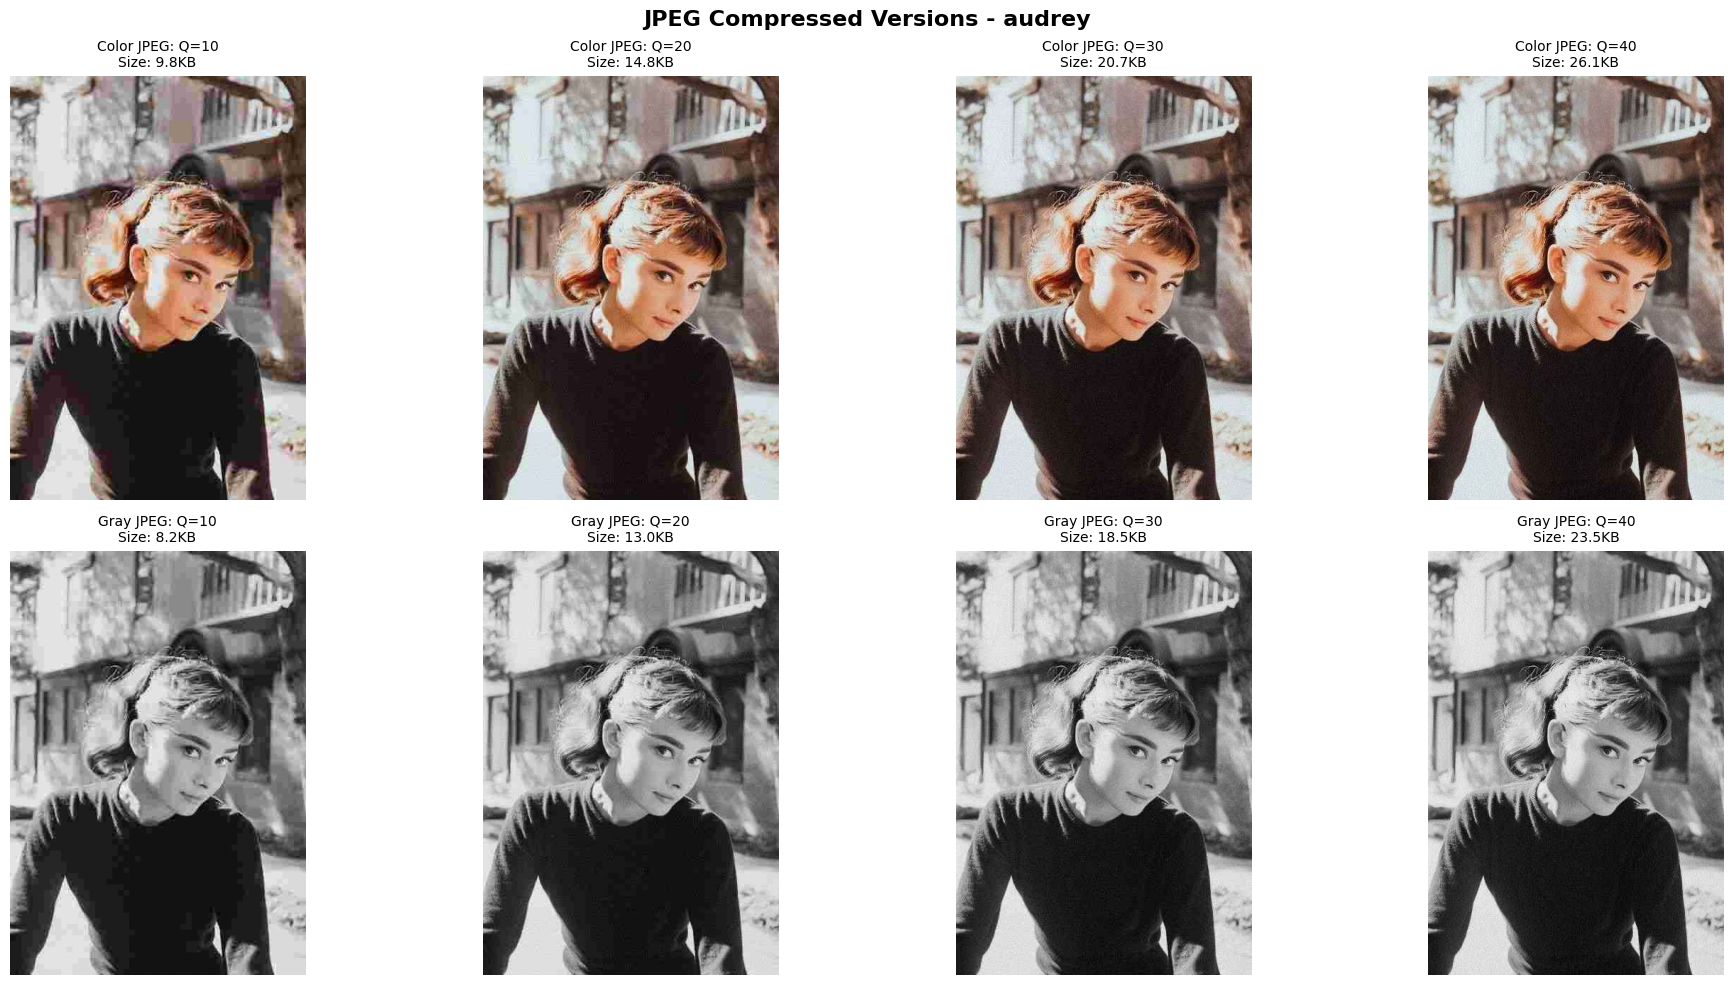

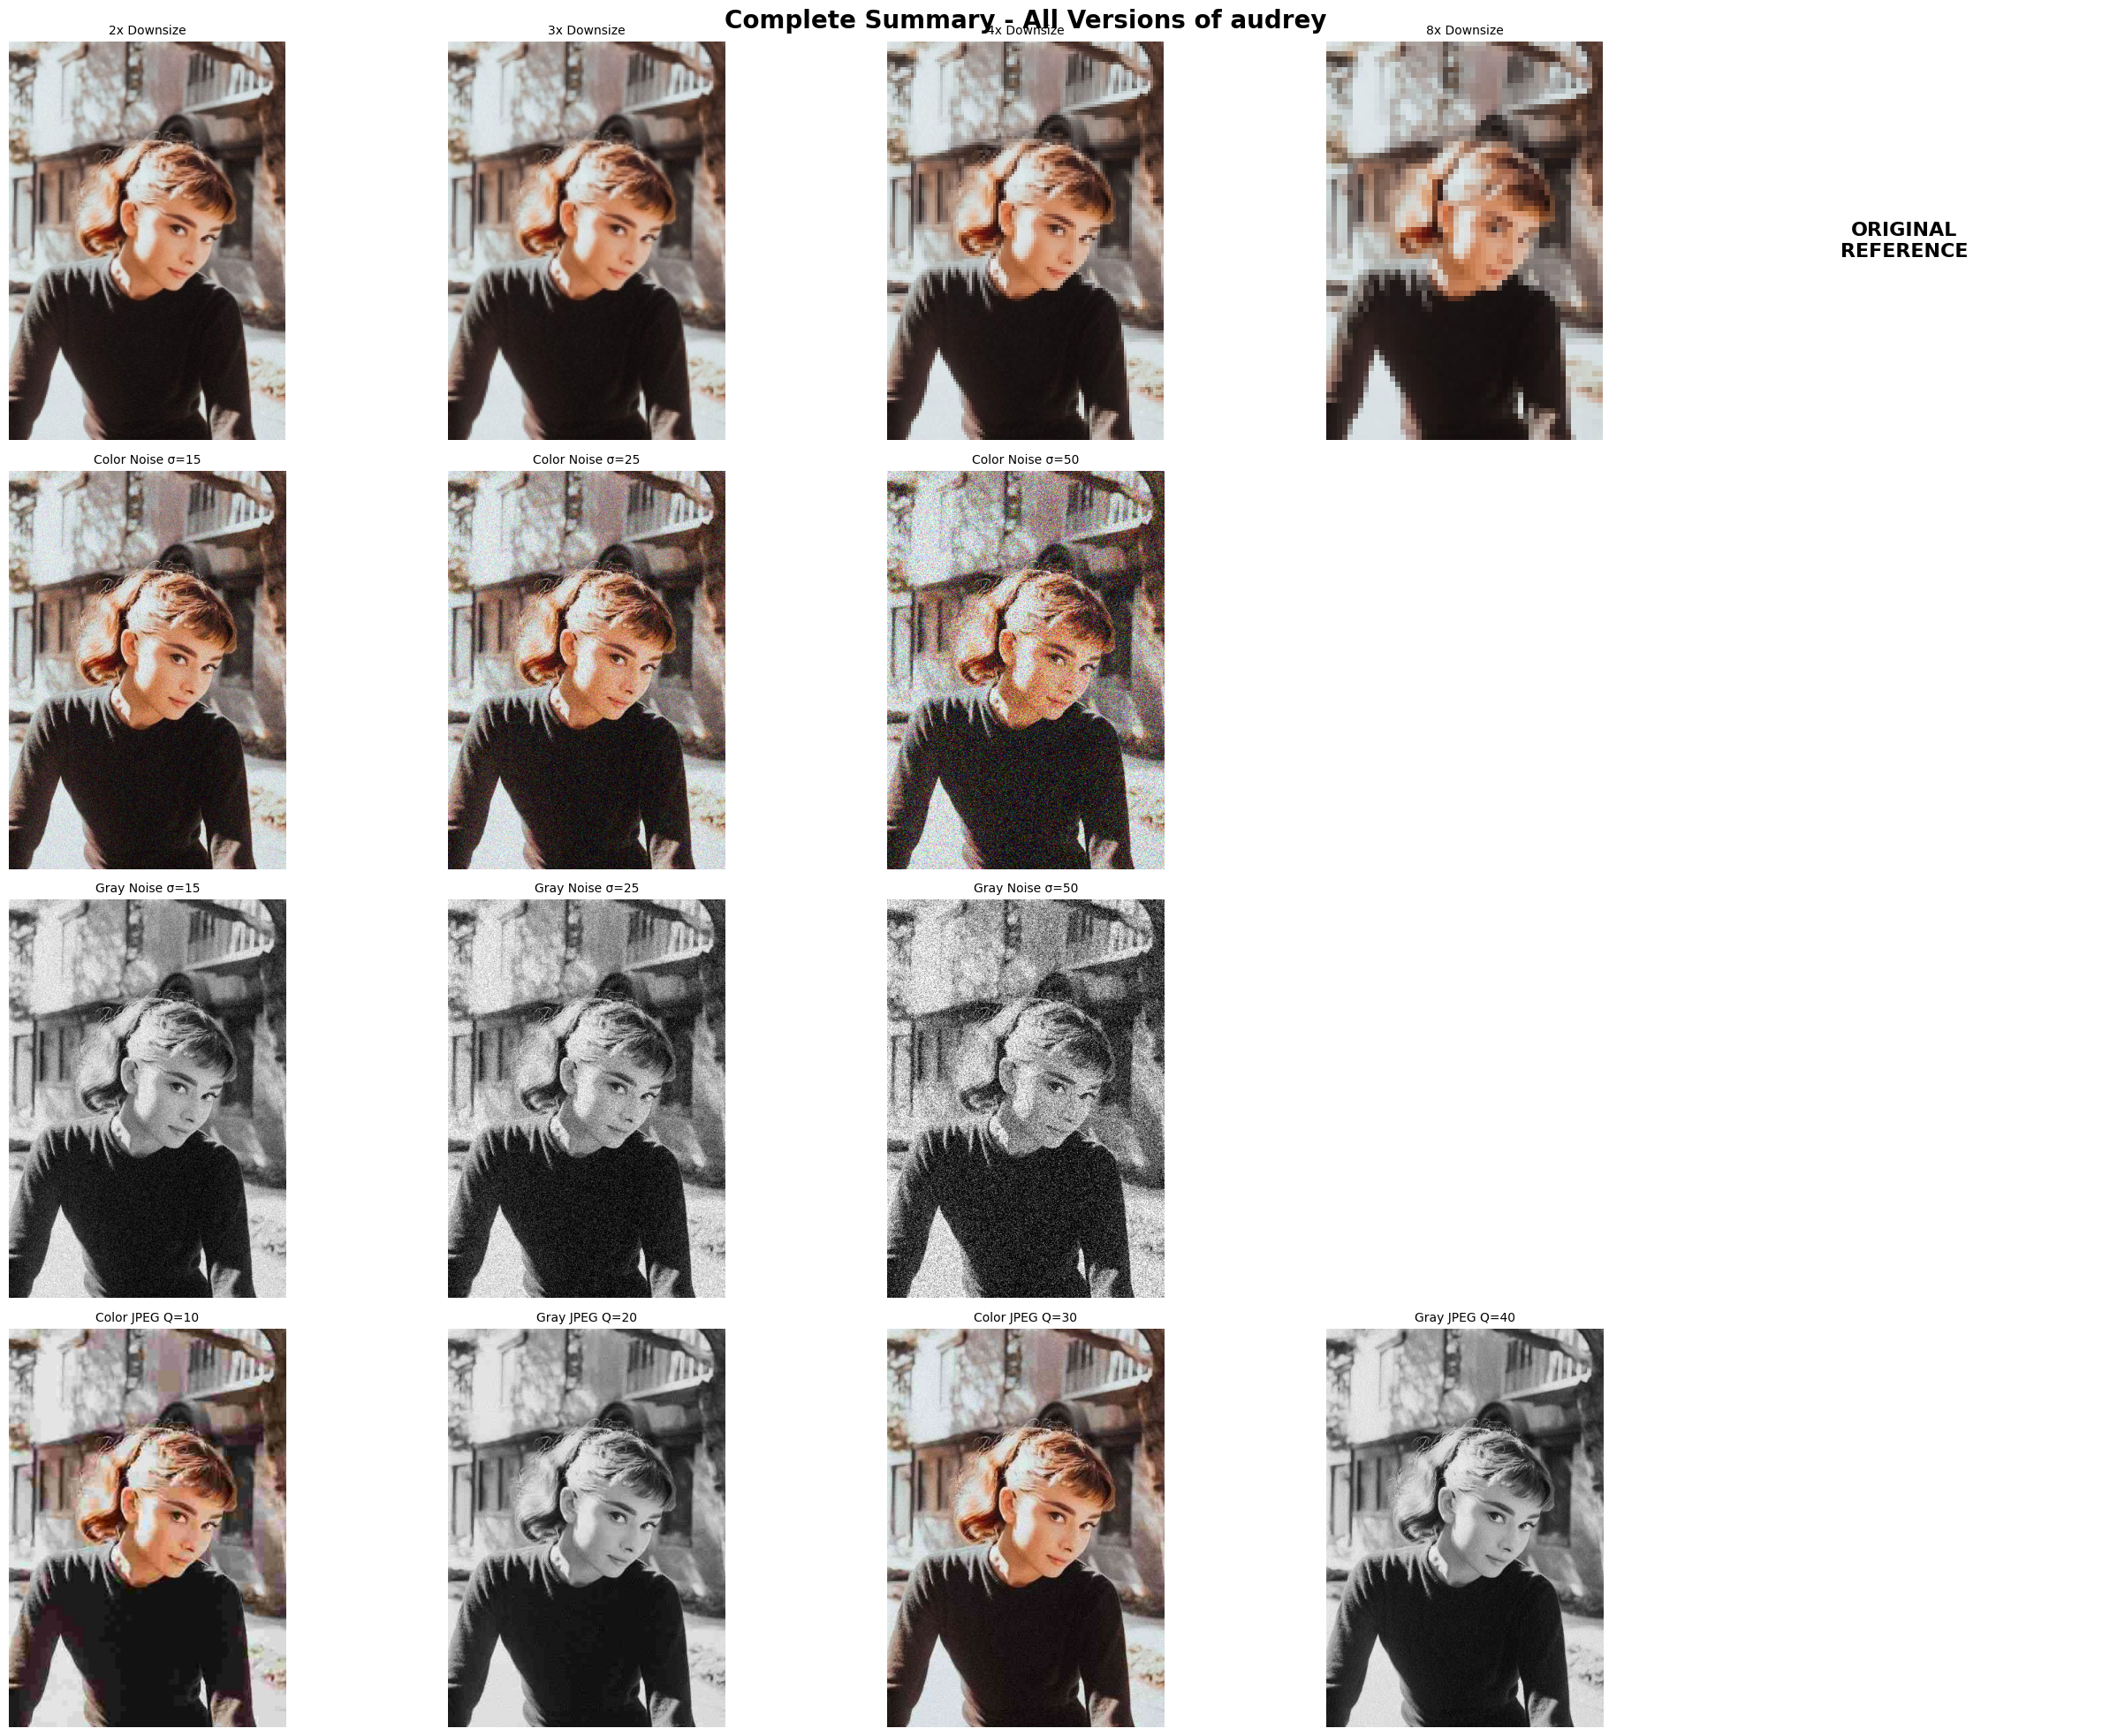

In [46]:
plot_all_versions(image_folder=image_folder, image_path=image_path)